In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [47]:
df = pd.read_csv("datasets/energydata_complete.csv", )

In [48]:
df.head()

,Unnamed: 0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

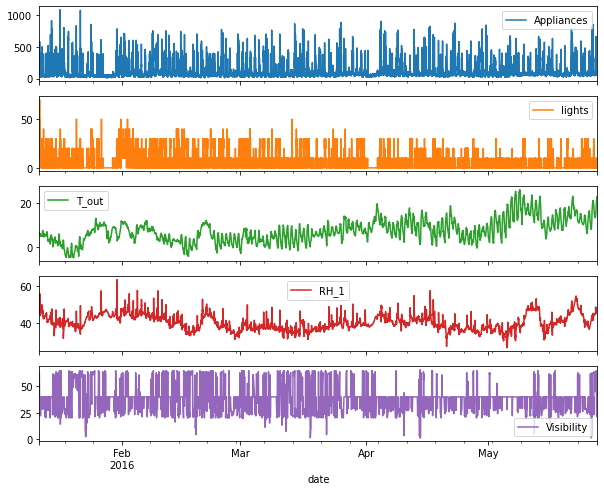

In [6]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [7]:
df_input = df[['Appliances', 'lights', 'T_out', 'RH_1', 'Visibility']]

In [8]:
df_input.head()

,Appliances,lights,T_out,RH_1,Visibility
0,60,30,6.600000,47.596667,63.000000
1,60,30,6.483333,46.693333,59.166667
2,50,30,6.366667,46.300000,55.333333
3,50,40,6.250000,46.066667,51.500000
4,60,40,6.133333,46.333333,47.666667


In [9]:
df_input.describe()

,Appliances,lights,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.411665,40.259739,38.330834
std,102.524891,7.935988,5.317409,3.979299,11.794719
min,10.000000,0.000000,-5.000000,27.023333,1.000000
25%,50.000000,0.000000,3.666667,37.333333,29.000000
50%,60.000000,0.000000,6.916667,39.656667,40.000000
75%,100.000000,0.000000,10.408333,43.066667,40.000000
max,1080.000000,70.000000,26.100000,63.360000,66.000000


In [10]:
df_input.query('Appliances > 500')

,Appliances,lights,T_out,RH_1,Visibility
11,580,60,5.983333,46.396667,40.000000
314,520,0,2.900000,41.530000,36.333333
392,550,10,2.033333,43.433333,40.000000
393,690,10,2.100000,43.766667,40.000000
394,620,10,2.166667,43.693333,40.000000
...,...,...,...,...,...
19586,600,0,20.833333,44.066667,40.000000
19587,520,0,20.900000,43.366667,40.000000
19684,580,0,15.900000,47.226667,61.000000
19685,660,0,16.100000,47.693333,61.000000


In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_input)

In [31]:
X = []
y = []

In [34]:
for i in range(60, scaled_data.shape[0]):
    X.append(scaled_data [i-60:i])
    y.append(scaled_data [i, 0])

In [36]:
import numpy as np

X, y = np.array(X), np.array(y)

In [37]:
X_train = X[:19000]
y_train = y[:19000]
X_test = X[19000:]
y_test = y[19000:]

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [39]:
regressor = Sequential()
regressor.add(LSTM(units= 20, activation = 'relu',\
                   return_sequences = True,\
                   input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units= 40, \
                   activation = 'relu', \
                   return_sequences = True))
regressor.add(Dropout(0.5))
regressor.add(LSTM(units= 80, \
                   activation = 'relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(units = 1))  

In [40]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 20)            2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 20)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 40)            9760      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 40)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 80)                38720     
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [41]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [42]:
regressor.fit(X_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
594/594 [==============================] - 140s 230ms/step - loss: 0.0081
Epoch 2/2
594/594 [==============================] - 138s 232ms/step - loss: 0.0071


In [44]:
y_pred = regressor.predict(X_test)

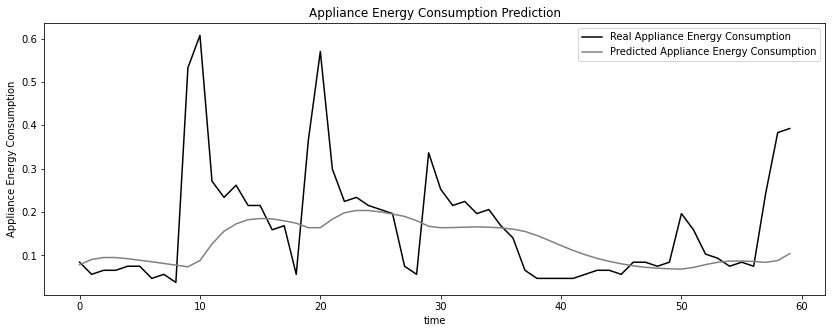

In [49]:
plt.figure(figsize=(14,5))
plt.plot(y_test[-60:], color = 'black', \
         label = "Real Appliance Energy Consumption")
plt.plot(y_pred[-60:], color = 'gray', \
         label = 'Predicted Appliance Energy Consumption')
plt.title('Appliance Energy Consumption Prediction')
plt.xlabel('time')
plt.ylabel('Appliance Energy Consumption')
plt.legend()
plt.show()